## **Customer Churn rate Prediction Model**

#### **Business Understanding**

Customer attrition, or churn, is one of the most significant expenses for any organization. It represents the percentage of customers who discontinue using a company's product or service within a given timeframe. For example, if a company starts the year with 500 customers and ends with 480, the churn rate would be 4%. Understanding and mitigating this churn is crucial for sustaining growth and profitability.

##### Problem Statement
A few months ago, Vodafone experienced a significant loss of customers due to heightened competition within the telecommunications industry. This decline in customer retention has adversely impacted their revenue and profit margins. To address this issue and improve their competitive position, Vodafone aims to understand the factors contributing to customer churn and develop effective strategies to retain their customers.


 ##### Project Goal

By leveraging advanced data analytics and machine learning techniques, we aim to provide Vodafone with valuable insights and tools to effectively combat customer churn and strengthen their market position.

In this project, we will analyze Vodafone's customer data to:

-Identify Key Indicators of Churn: Determine the primary factors that influence customers to leave Vodafone, such as service quality, pricing, customer support, and promotional offers.

-Predict Customer Churn: Develop a predictive model to accurately identify customers at risk of churning, allowing proactive retention efforts.

-Develop Retention Strategies: Suggest actionable strategies based on the analysis to improve customer satisfaction and loyalty, ultimately reducing churn rates and enhancing Vodafone's revenue and profitability.



##### Stakeholders

- Management
- Marketing
- Data Team

##### Key Metrics and Success Criteria 

1. Accuracy- The model should have an accuracy score of 85% (On balanced data). Good models are expected to have an accuracy score of >0.80 or 80%
2. Threshold for precision and Recall- The model should achieve a precision and recall at least 80%. This assures that the model is reliable in predicting churn and identifying most of the actual churn.
3. Minimu F1 Score- The F1 score should be at least 0.75. This balances the trade off between precision and recalls, indicating the model performs well even if the clas distribution is imbalanced.
4. AUC-ROC Score- This should be at least 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and not churn customers.
5. Confusion Matrix- The number of False Negatives (FN) should be lower to ensure that most of the churn cases are identified.
6. Lift and Gain- The lift value at the top decline (top ten of predicted probabilities) should be significantly higher than 1 indicating that the model effectively has high risk of churn customers.



##### Features

CustomerID-- A unique customer identification

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

In [76]:
# %pip install pyodbc  
# %pip install python-dotenv 
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install sqlalchemy pyodbc
# %pip install openpyxl
# %pip install statsmodels
# %pip install pandas plotly openpyxl
# # %pip install --upgrade pip
# %pip install nbformat
# %pip install xgboost
# %pip install phik 
# %pip install imbalanced-learn

In [77]:
# Data Manipulation Packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pyodbc
from dotenv import dotenv_values
import scipy.stats as stats
import warnings

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV
warnings.filterwarnings('ignore')



In [78]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r'G:\python\python project\project\Churn-rate-Prediction-Model\.env')

#Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#Create a connection string
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=200"

connection = pyodbc.connect(connection_string)
print("Connection successful")

Connection successful


### **Exploring All Datasets (EDA) & Data Cleaning**

#### **Load Datasets**

In [79]:
# Loading the First 3000 dataset
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [81]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### **Import the second data set and third**

In [82]:
data2= pd.read_csv(r"G:\python\python project\project\Churn-rate-Prediction-Model\data\LP2_Telco-churn-second-2000.csv")
data3= pd.read_excel(r"G:\python\python project\project\Churn-rate-Prediction-Model\data\Telco-churn-last-2000.xlsx") 

In [83]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


##### Merge  datasets 1 and 2 for traing

In [85]:
train= pd.concat([data,data2], ignore_index= True)
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [86]:
train.replace(True, 'Yes', inplace=True)
train.replace(False, 'No', inplace=True)
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [87]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [89]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [90]:
train.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [91]:
train.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(train)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


In [92]:
train.duplicated().sum()

np.int64(0)

In [93]:
train.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231
DeviceProtection,4392,3,No,2219


In [94]:
columns= train.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [95]:
# Unique values in each column
for column in columns:
    print(f'{column}')
    print(f'There are {train[column].unique().size} unique values')
    print(f'These are {train[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 4 unique values
These are [None 'No' 'Yes' 'No phone service']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 4 unique values
These are ['No' 'Yes' None 'No internet service']
OnlineBackup
There are 4 unique values
These

##### Key Insights
- There some null values and unique values in the datasets
- There are no duplicated values for this project.
- From the mean and median in total charges it not the same hence there will be a lot of outliers.

# Univariate Analysis

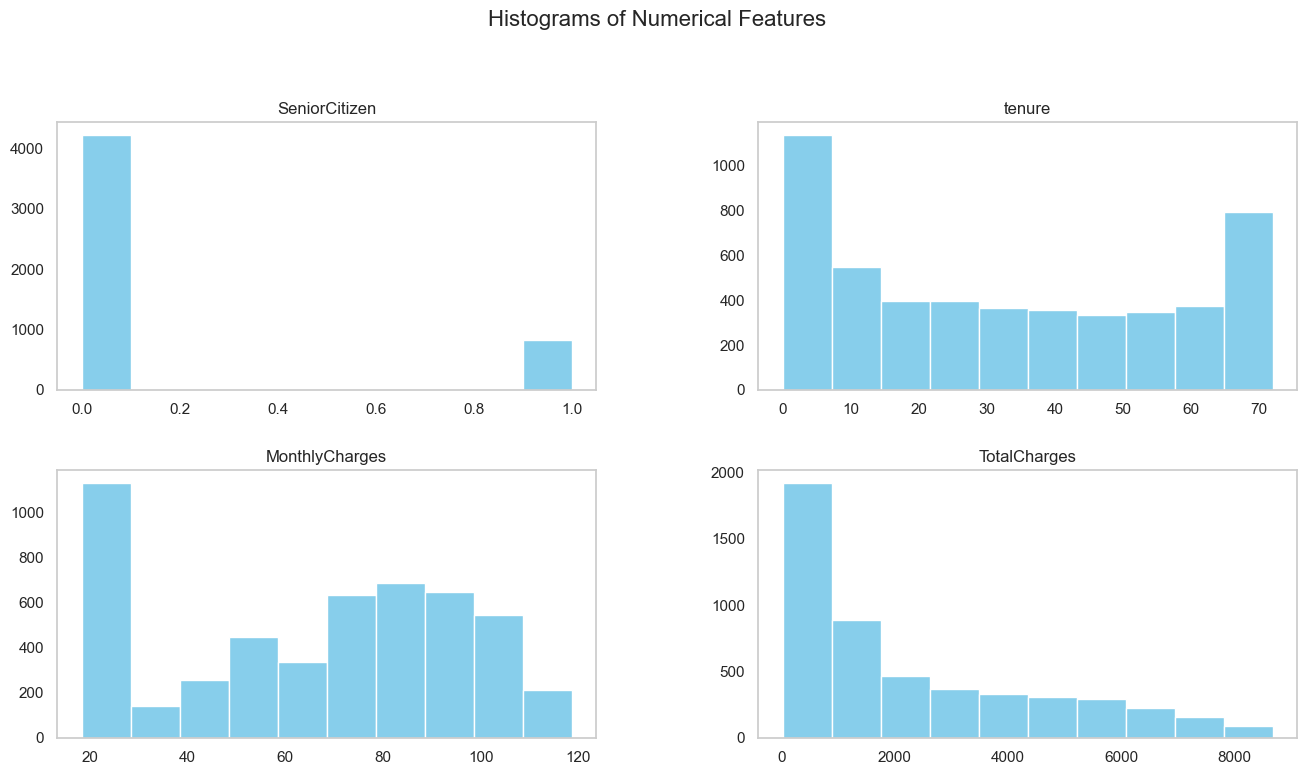

In [96]:
train.hist(figsize=(16,8), grid =False, color='skyblue')

plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, fontsize=16)

plt.show()

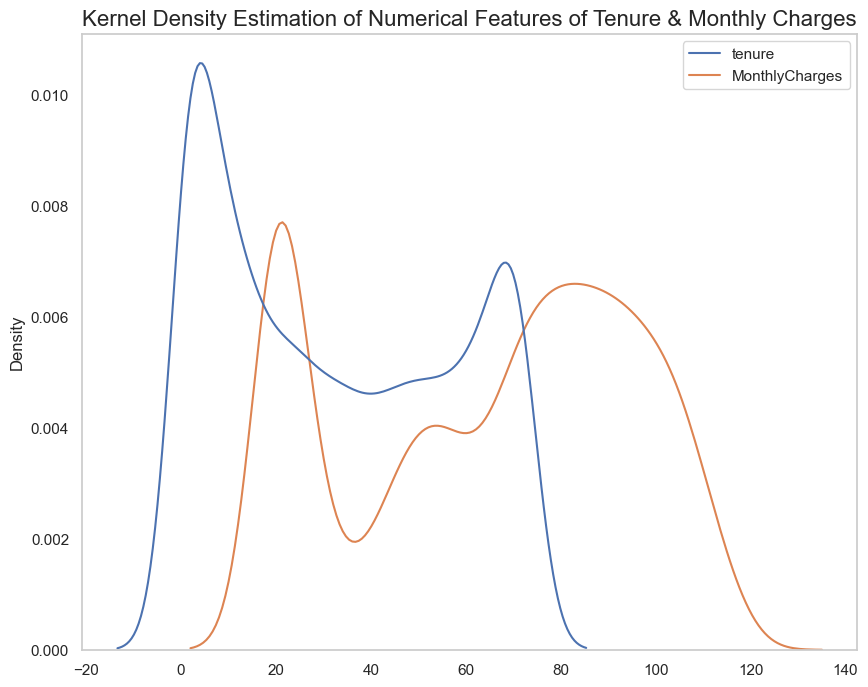

In [97]:
# Create a figure with the specified size
plt.figure(figsize=(10,8))
sns.kdeplot(train.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
plt.grid(False)
plt.title('Kernel Density Estimation of Numerical Features of Tenure & Monthly Charges', fontsize=16)

plt.show()

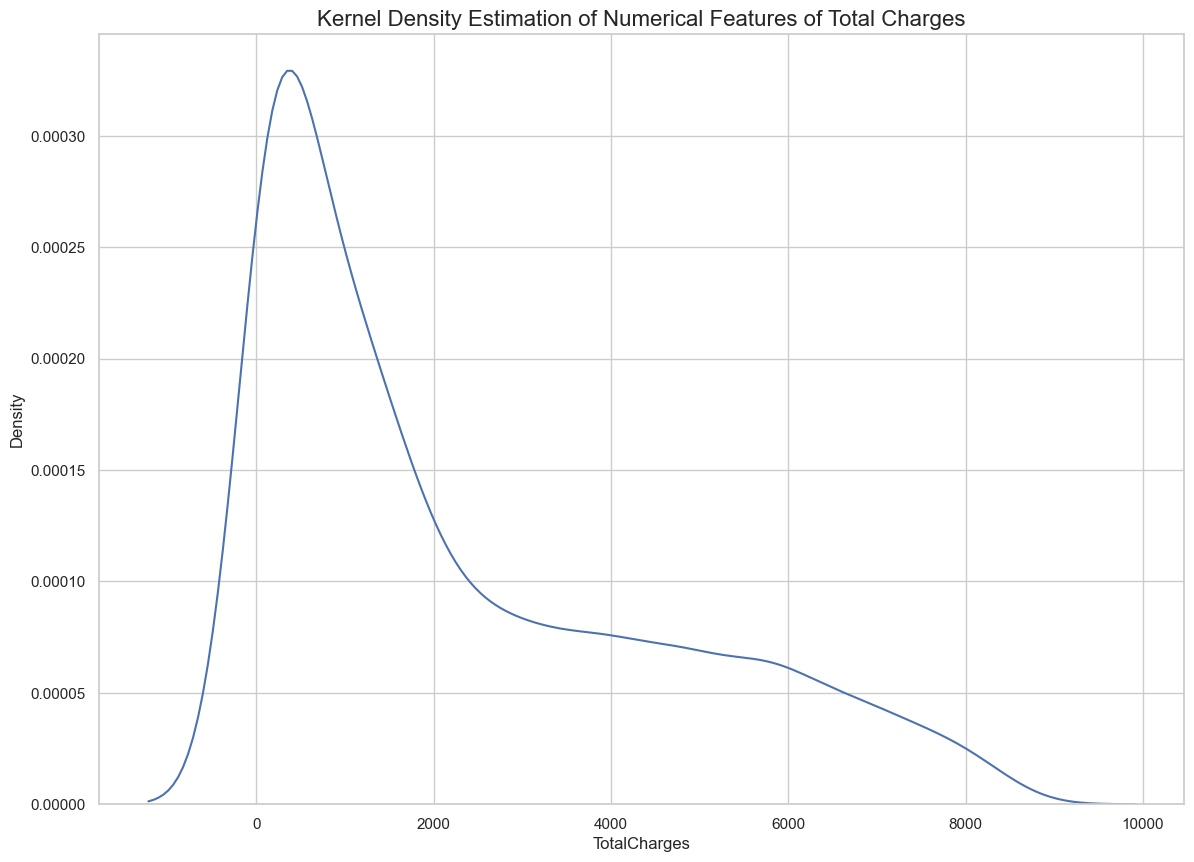

In [98]:
plt.figure(figsize=(14,10))
sns.kdeplot(train['TotalCharges'])

plt.title('Kernel Density Estimation of Numerical Features of Total Charges', fontsize=16)
plt.show()

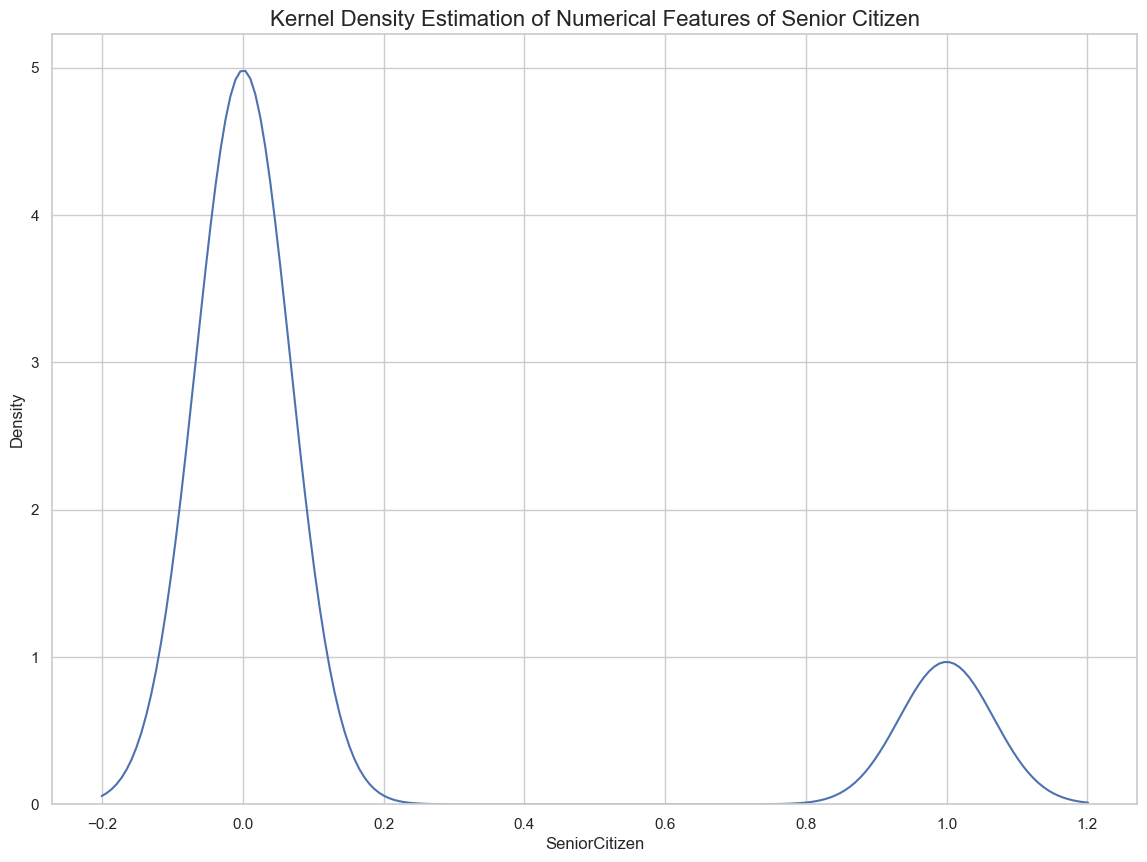

In [99]:
plt.figure(figsize=(14,10))
sns.kdeplot(train['SeniorCitizen'])

plt.title('Kernel Density Estimation of Numerical Features of Senior Citizen', fontsize=16)
plt.show()

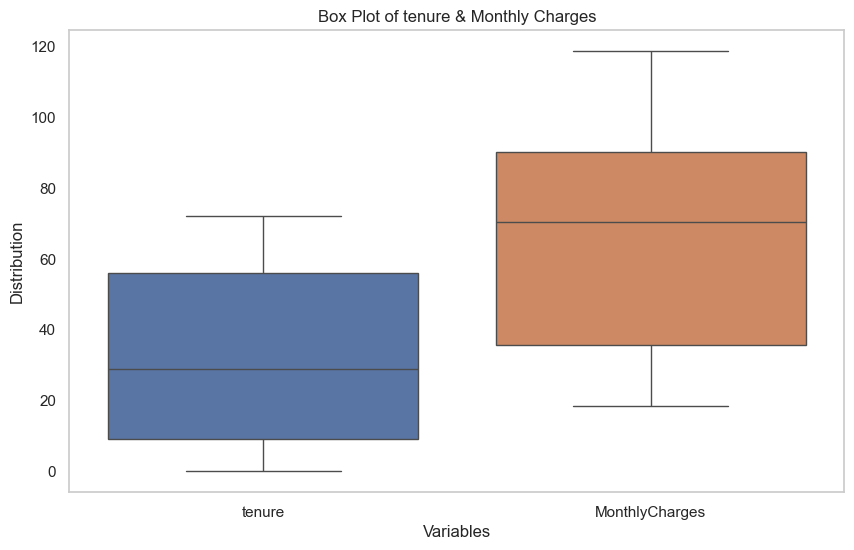

In [100]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(train[['tenure', 'MonthlyCharges']])
 
# Add titles and labels
plt.title('Box Plot of tenure & Monthly Charges')
plt.xlabel('Variables')
plt.ylabel('Distribution')
 
plt.grid(False)
 
# Display the plot
plt.show()

### Bi-Variate Analysis

In [101]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
numerical_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

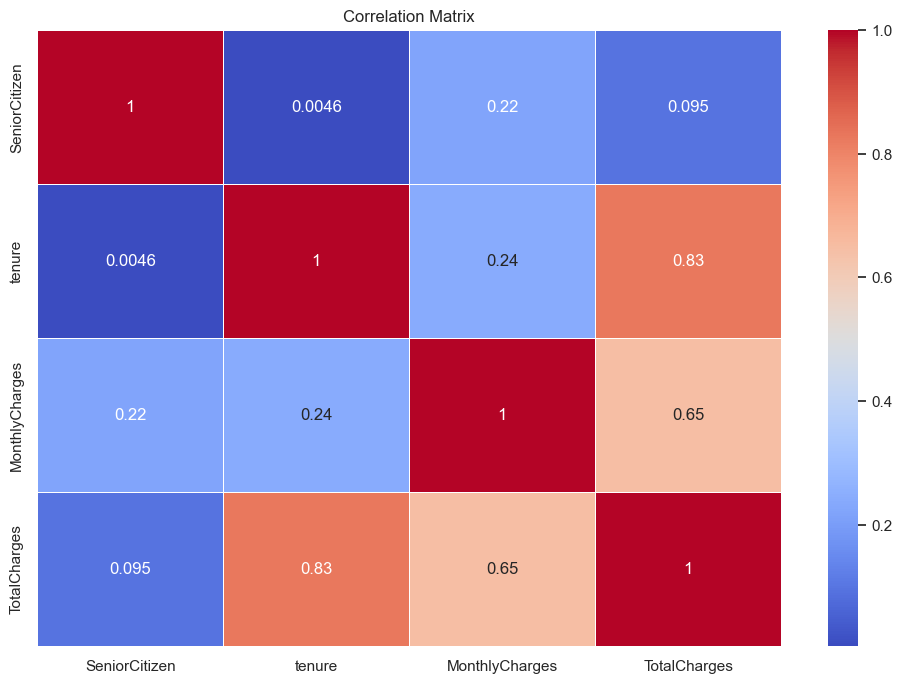

In [102]:
numeric_df = train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

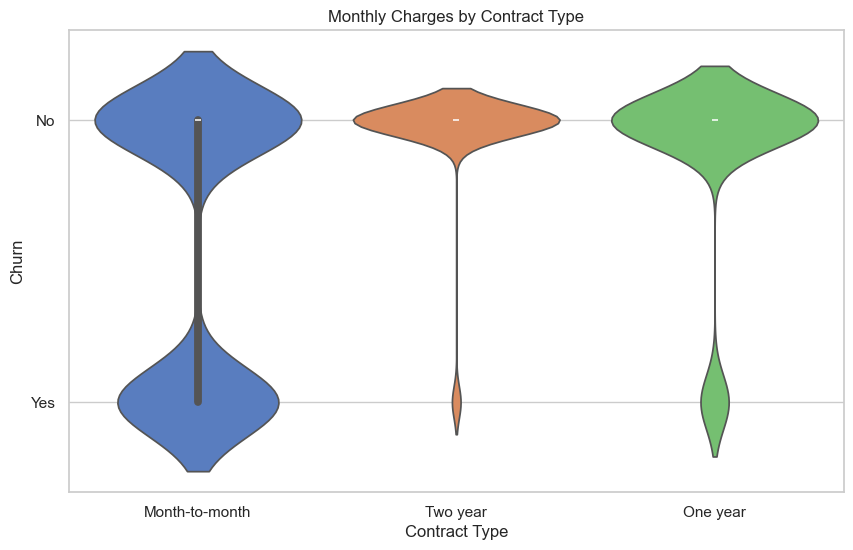

In [103]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='Churn', data=data2, palette='muted')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.show()

### Multi-Variate Analysis

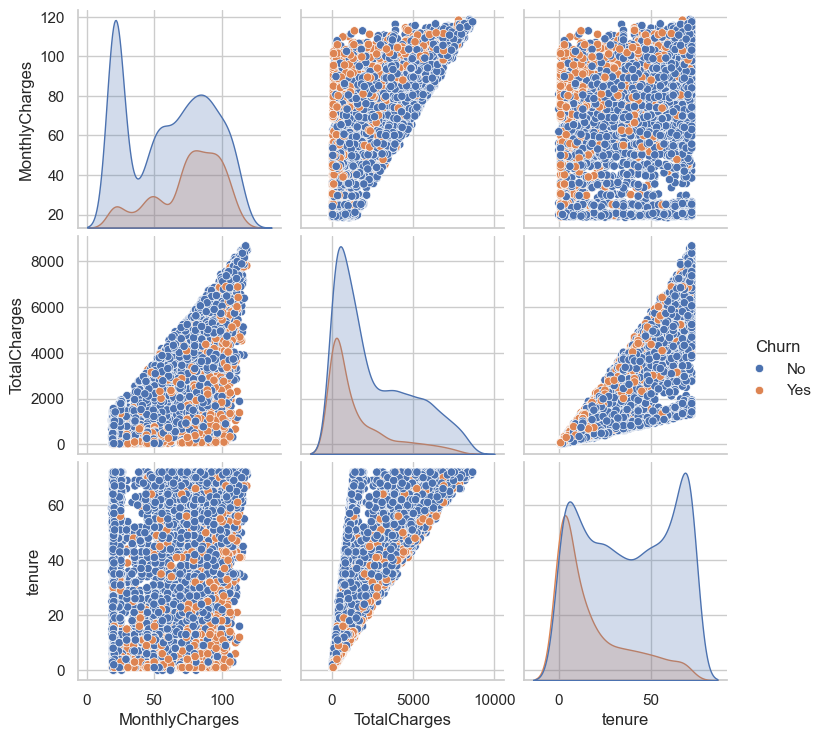

In [104]:
sns.pairplot(train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

### Answering Analytical Questions

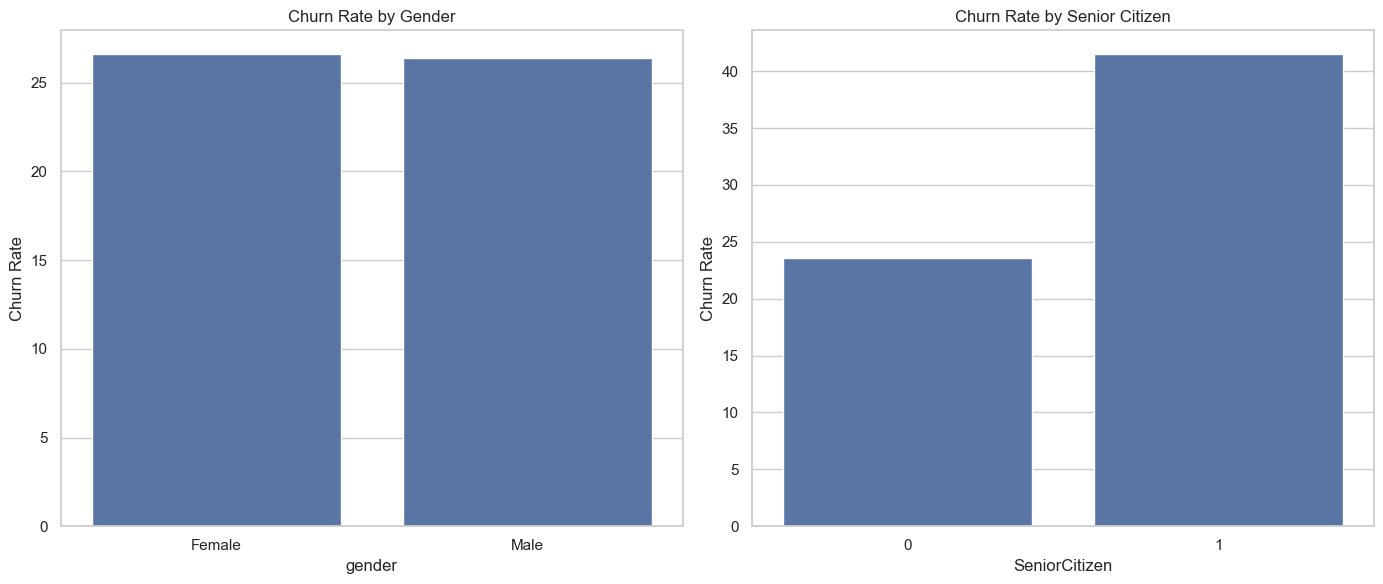

In [105]:
### Demographics associated with churn

# Gender vs Churn
gender_churn = train.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn['Churn Rate'] = gender_churn['Yes'] * 100
 
# Senior Citizen vs Churn
senior_churn = train.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
senior_churn['Churn Rate'] = senior_churn['Yes'] * 100

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=gender_churn.index, y='Churn Rate', data=gender_churn, ax=axes[0])
sns.barplot(x=senior_churn.index, y='Churn Rate', data=senior_churn, ax=axes[1])
axes[0].set_title('Churn Rate by Gender')
axes[1].set_title('Churn Rate by Senior Citizen')
plt.tight_layout()
plt.show()


In [106]:
# Group by tenure bins and churn
train['tenure_bins'] = pd.cut(train['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
churn_by_tenure = train.groupby('tenure_bins')['Churn'].value_counts(normalize=True).unstack()
churn_by_tenure

Churn,No,Yes
tenure_bins,,
0-12,0.522164,0.477836
13-24,0.706284,0.293716
25-36,0.794362,0.205638
37-48,0.806798,0.193202
49-60,0.852542,0.147458
61-72,0.932087,0.067913


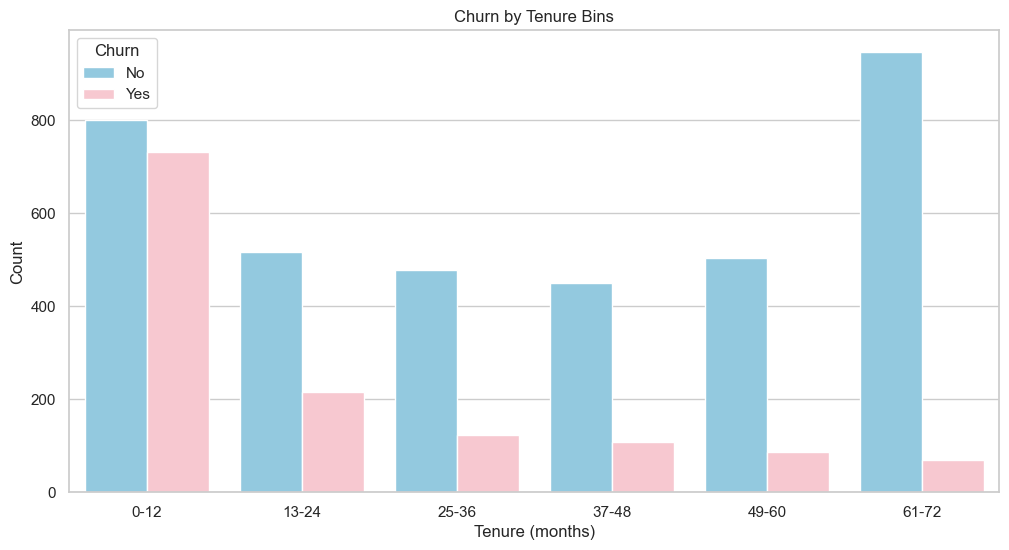

In [107]:
# Plotting churn by tenure bins
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='tenure_bins', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Tenure Bins')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

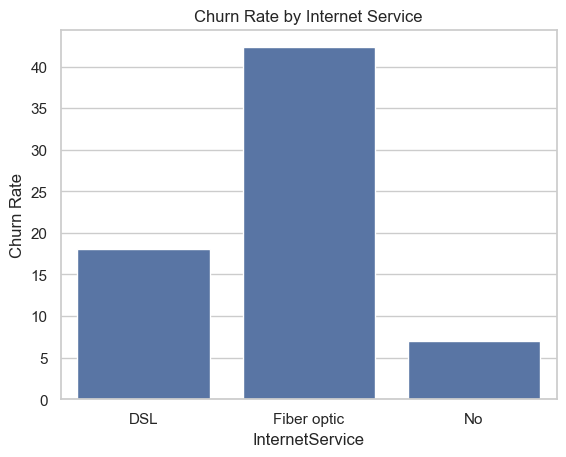

In [108]:
# Internet Service vs Churn
internet_churn = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
internet_churn['Churn Rate'] = internet_churn['Yes'] * 100
 
# Plotting
sns.barplot(x=internet_churn.index, y='Churn Rate', data=internet_churn)
plt.title('Churn Rate by Internet Service')
plt.show()

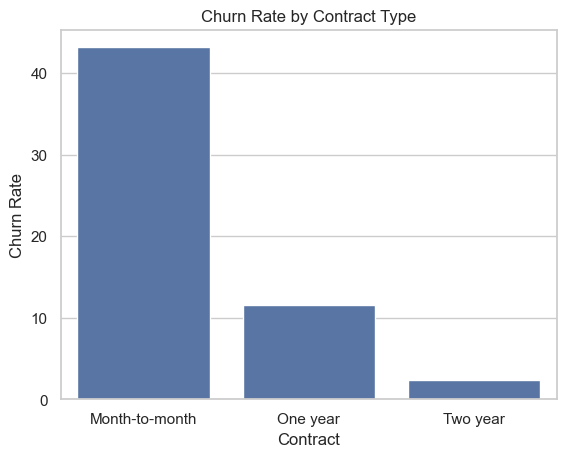

In [109]:
# Contract vs Churn
contract_churn = train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn['Churn Rate'] = contract_churn['Yes'] * 100
 
# Plotting
sns.barplot(x=contract_churn.index, y='Churn Rate', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.show()

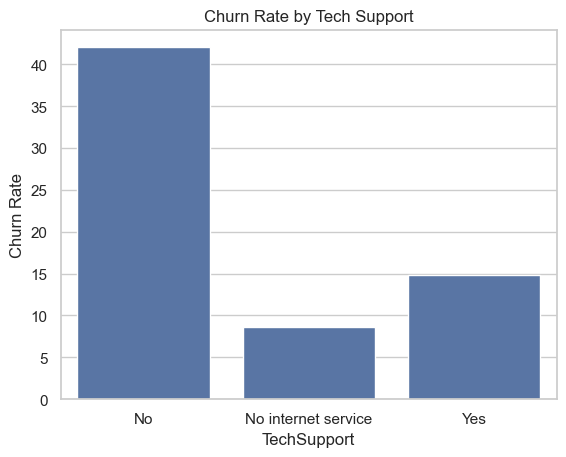

In [110]:
# Tech Support vs Churn
techsupport_churn = train.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
techsupport_churn['Churn Rate'] = techsupport_churn['Yes'] * 100
 
# Plotting
sns.barplot(x=techsupport_churn.index, y='Churn Rate', data=techsupport_churn)
plt.title('Churn Rate by Tech Support')
plt.show()

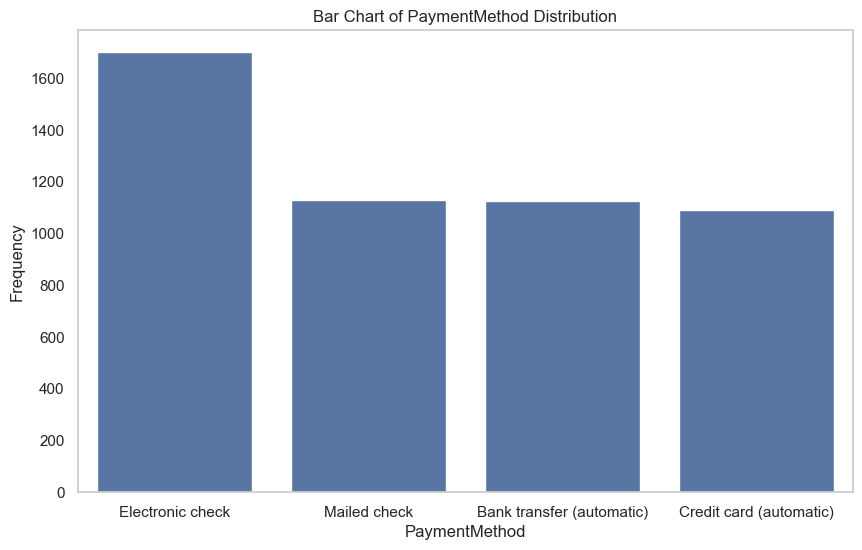

In [111]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(train, x='PaymentMethod', order=train['PaymentMethod'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of PaymentMethod Distribution')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

#### **Hypothesis Testing**

##### Null Hypothesis
 ##### (HO) There is no significant difference in churn rates among customers with different contract types.
##### Alternative Hpothesis
##### (H1) There is a significant difference in churn rates among customers with different contract types.

In [112]:
# Drop the row with the unknown value from the Churn column
train.drop(index=2988, inplace=True)
train.reset_index(drop=True, inplace=True)

# Drop 'customerID' column as it is not needed for analysis
train.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})
train
# Replace invalid TotalCharges with NaN
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns = train.select_dtypes(include=['number']).columns
cat_columns = train.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
train[num_columns] = imputer_num.fit_transform(train[num_columns])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
train[cat_columns] = imputer_cat.fit_transform(train[cat_columns])

# Create contingency table for Churn and Contract
contingency_table = pd.crosstab(train['Churn'], train['Contract'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Test")
print("----------------")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.")
else:
    print("Fail to reject the null hypothesis: This means there is no significant difference in churn rates among customers with different contract types.")


Chi-Square Test
----------------
Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192
Degrees of Freedom: 2
Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.


### Data Preparation

In [113]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0.0,Yes,No,1.0,No,None,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,0.0,0-12
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.950001,1889.500000,0.0,25-36
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,1.0,0-12
3,Male,0.0,No,No,45.0,No,None,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,0.0,37-48
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,1.0,0-12


#### Handling misssing values 

In [114]:
train['TotalCharges'].fillna(train['TotalCharges'].median(), inplace=True) # TotalCharges column 


In [115]:
miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',                   #For missing values in categorical columns 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Churn']

for col in miss_categ:
    mode_val = train[col].mode()[0]                                      
    train[col].fillna(mode_val, inplace=True)

### **Save dataset into Csv file** 

In [116]:
train.to_csv("train.csv", index= True)

In [117]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_bins         8
dtype: int64

In [118]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,0.0,0-12
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.950001,1889.500000,0.0,25-36
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,1.0,0-12
3,Male,0.0,No,No,45.0,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,0.0,37-48
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,1.0,0-12


####  **Split data to X and y (Input and Output variables )**

In [119]:
X= train.drop('Churn', axis= 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_bins
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,0-12
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,25-36
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,0-12
3,Male,0.0,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,37-48
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,0-12


In [120]:
y= train['Churn']
y.value_counts()

Churn
0.0    3706
1.0    1336
Name: count, dtype: int64

In [121]:
X.shape, y.shape

((5042, 20), (5042,))

#### **Split data to categorical and numerical columns**

In [122]:
numerical_columns= X.select_dtypes('number').columns
print(f"The following are numerical columns{numerical_columns}")

print(f"...........................................................................")
categorical_columns= X.select_dtypes('object').columns
print(f"\n The folllowing are categorical columns{categorical_columns}")


The following are numerical columnsIndex(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
...........................................................................

 The folllowing are categorical columnsIndex(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [123]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4033, 20), (4033,)), ((1009, 20), (1009,)))

In [124]:
# We use a lable encoder for y because its not a 2 dimentional array 

encoder = LabelEncoder()

# Fit the encoder to the target variable
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded= encoder.transform(y_test)

In [125]:
# Check skewness to determine which scaler to use 
X.select_dtypes('number').skew()

SeniorCitizen     1.830907
tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.946402
dtype: float64

### Descison
Standard scaler is disqualified as our data not anything close to a bell shape 
MinMax scaller is diqualified as our data has outliers 
We use Robust Scaler due to the biases in X train  

In [126]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5042.0,0.162436,0.368886,0.000000,0.0000,0.000000,0.000000,1.000000
tenure,5042.0,32.568822,24.525954,0.000000,9.0000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.7625,70.550003,90.050002,118.650002
TotalCharges,5042.0,2299.526825,2266.828846,18.799999,417.8750,1401.000000,3857.012573,8670.100000


We decide on Quantile transformer as it transform our data to a close to a bell shape

#### *Pipeline*

In [127]:
numeric_pipeline= Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('QuantileTransformation', QuantileTransformer ()),
])

categorical_pipeline= Pipeline([
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('encoder', OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),

])

In [128]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('QuantileTransformation',
                                                  QuantileTransformer())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

#### **Modeling & Evaluation**

In [129]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]


# Arrays to store individual model predictions and their probabilities
model_predictions = {}
model_probabilities = {}

# Store confusion matrices for each model
confusion_matrices = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Store predictions and probabilities
    model_predictions[model_name] = y_pred
    model_probabilities[model_name] = y_prob
    # Store confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm

    # Evaluate model performance
    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test_encoded, y_prob)

    # Print ROC AUC score
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('=' * 50)


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

ROC AUC Score: 0.8554
Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.62      0.51      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009

ROC AUC Score: 0.8355
KNN
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       742
           1       0.55      0.52      0.54       267

    accuracy                           0.76      1009
   macro avg       0.69      0.68      0.69   

In [130]:
# Convert confusion matrices to DataFrame
df_scores = pd.DataFrame.from_dict({model_name: [conf_matrix] for model_name, conf_matrix in confusion_matrices.items()}, orient='index', columns=['confusion_matrix'])
df_scores 

,confusion_matrix
Logistic Regression,"[[659, 83], [117, 150]]"
Random Forest,"[[658, 84], [131, 136]]"
KNN,"[[630, 112], [128, 139]]"
SVM,"[[667, 75], [127, 140]]"
GBM,"[[663, 79], [119, 148]]"
Neural Network,"[[650, 92], [112, 155]]"


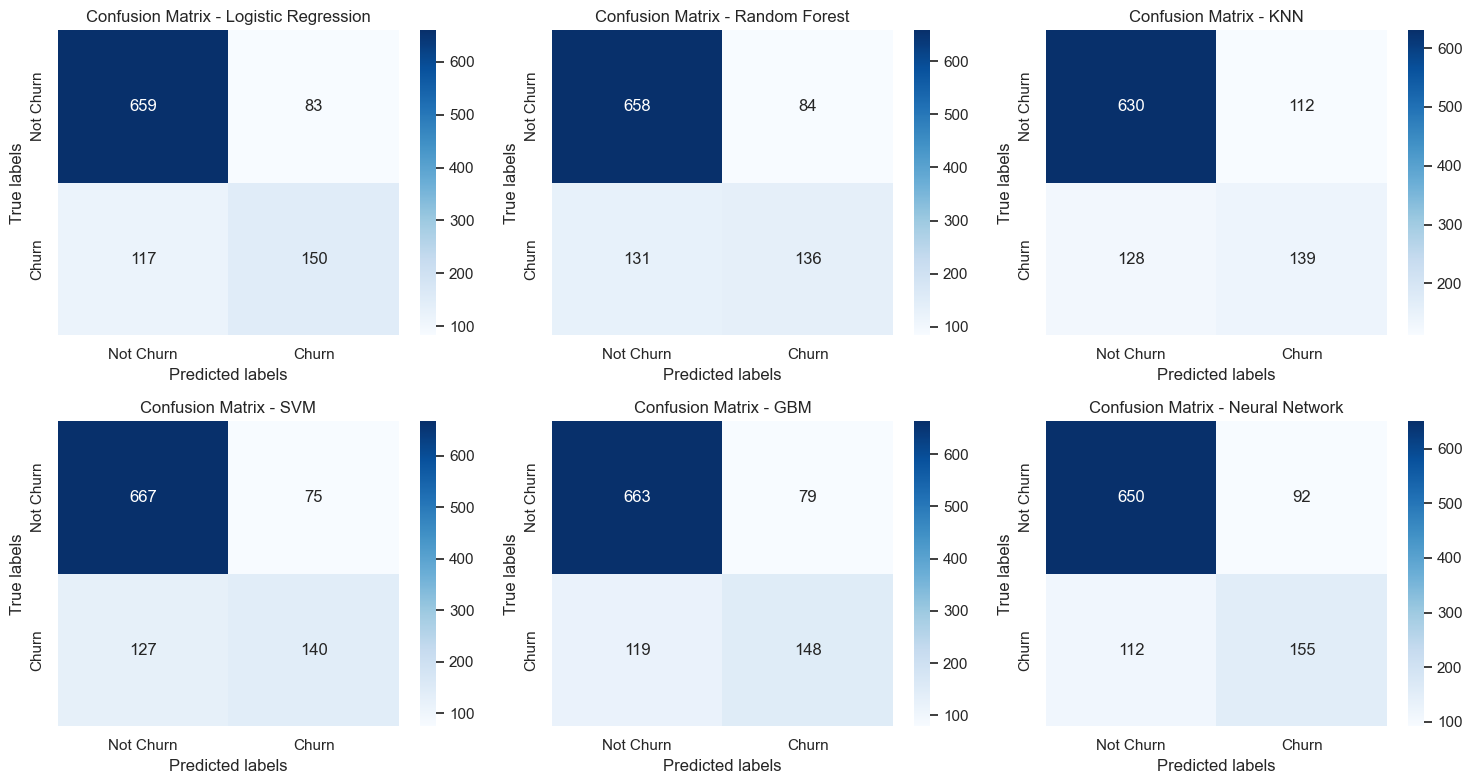

In [131]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(df_scores)

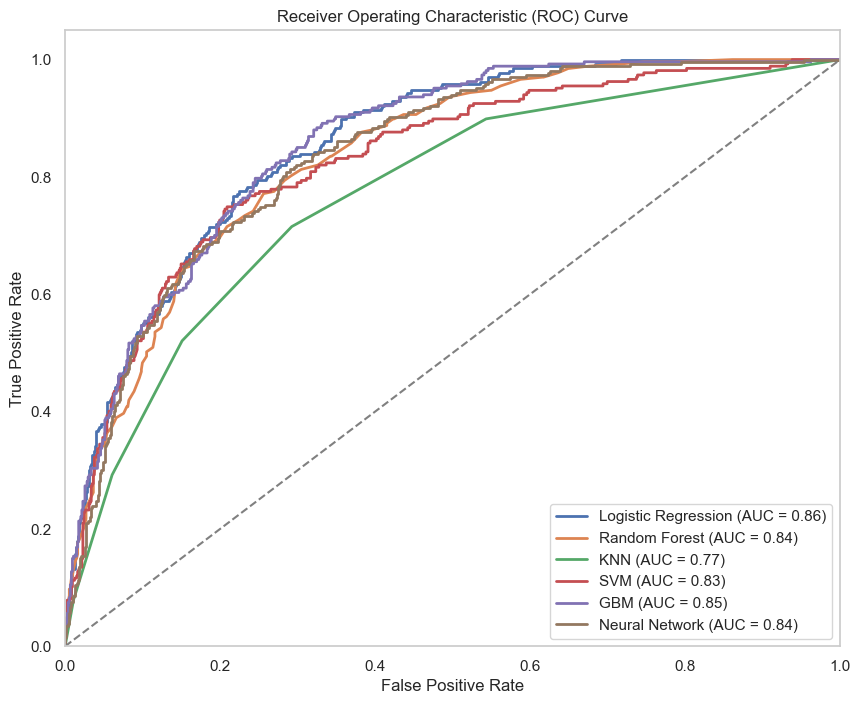

In [132]:
# Plot ROC AUC curve for all models
plt.figure(figsize=(10, 8))

# Iterate over each model's probabilities and plot ROC curve
for model_name, y_prob in model_probabilities.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

#### **Hyperparameter Tuning**

In [133]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    },
    'GBM': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    }
}

In [134]:
# Perform Hyperparameter Tuning

best_estimators = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train_encoded)
    
    # Store the best estimator
    best_estimators[model_name] = grid_search.best_estimator_

    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    auc_roc = roc_auc_score(y_test_encoded, y_prob)
    
    # Print best parameters and ROC AUC score
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best ROC AUC score for {model_name}: {grid_search.best_score_:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    print('=' * 50)

Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best ROC AUC score for Logistic Regression: 0.8493
Accuracy: 0.7978
Precision: 0.6275
Recall: 0.5805
F1 Score: 0.6031
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best ROC AUC score for Random Forest: 0.8455
Accuracy: 0.7978
Precision: 0.6275
Recall: 0.5805
F1 Score: 0.6031
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best ROC AUC score for KNN: 0.8085
Accuracy: 0.7978
Precision: 0.6275
Recall: 0.5805
F1 Score: 0.6031
Best parameters for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best ROC AUC score for SVM: 0.8454
Accuracy: 0.7978
Precision: 0.6275
Recall: 0.5805
F1 Score: 0.6031
Best parameters for GBM: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Best ROC AUC score for GBM: 0.8468
Accuracy: 0

Trying it on both balanced and unbalanced data for comparison. For the Balanced data we did oversampling using smote 

In [135]:

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]


#### **Train on unbalanced data**

In [136]:
unbalanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    unbalanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    unbalanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']
 
    unbalanced_table.loc[len(unbalanced_table)]= [model_name, accuracy, precision, recall,f1]
 
unbalanced_table.sort_values(by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,KNN,0.762141,0.757743,0.762141,0.759736
1,Random Forest,0.786918,0.776866,0.786918,0.779906
3,SVM,0.799802,0.790067,0.799802,0.792391
5,Neural Network,0.797820,0.793350,0.797820,0.795230
0,Logistic Regression,0.801784,0.794861,0.801784,0.797264
4,GBM,0.803766,0.796002,0.803766,0.798397


#### **Train on balanced data**

In [137]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline

balanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('OverSampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    balanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
 
    balanced_table.loc[len(balanced_table)]= [model_name, accuracy, precision, recall,f1]
 
balanced_table.sort_values(by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,KNN,0.687810,0.761496,0.687810,0.705407
5,Neural Network,0.738355,0.785410,0.738355,0.751080
0,Logistic Regression,0.763132,0.811066,0.763132,0.774900
3,SVM,0.772052,0.800053,0.772052,0.780705
1,Random Forest,0.784936,0.782682,0.784936,0.783740
4,GBM,0.785927,0.797486,0.785927,0.790421


In [138]:
# View balanced data pipelines 
balanced_pipeline

{'Logistic Regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    RobustScaler()),
                                                                   ('QuantileTransformation',
                                                                    QuantileTransformer())]),
                                                   Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                           

#### **Answering Analytical Questions** 

               PaymentMethod  ChurnPercentage
0  Bank transfer (automatic)        17.600000
1    Credit card (automatic)        15.412844
2           Electronic check        44.614479
3               Mailed check        18.794326


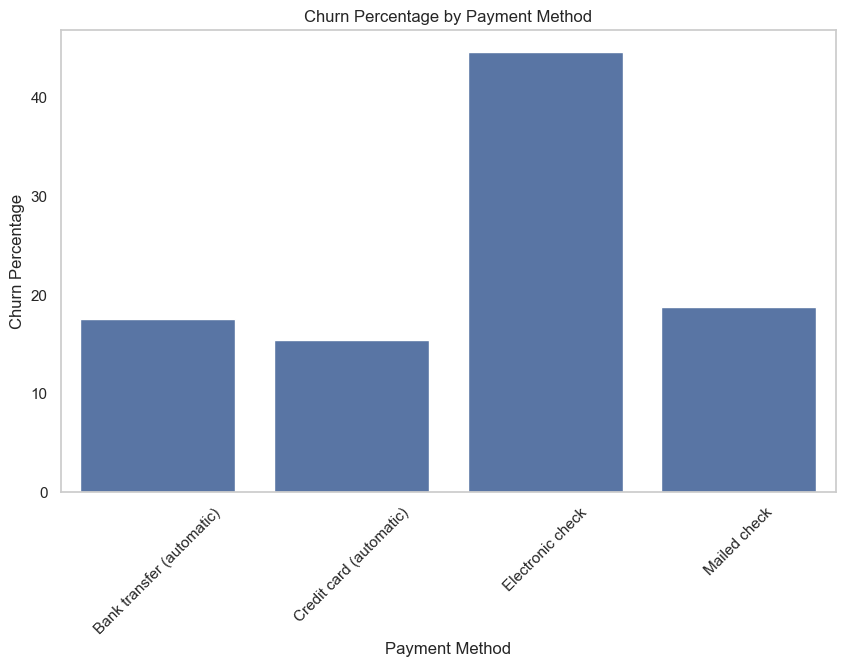

In [139]:
 #1. What is the Churn percentage as compared to paymment method 

churn_percentage = train.groupby('PaymentMethod')['Churn'].mean() * 100 
churn_percentage = churn_percentage.reset_index()
churn_percentage.columns = ['PaymentMethod', 'ChurnPercentage']
print(churn_percentage)


# Create a bar plot of churn percentage by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='ChurnPercentage', data=churn_percentage)

# Add title and labels
plt.title('Churn Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.grid(False)

# Show plot
plt.show()

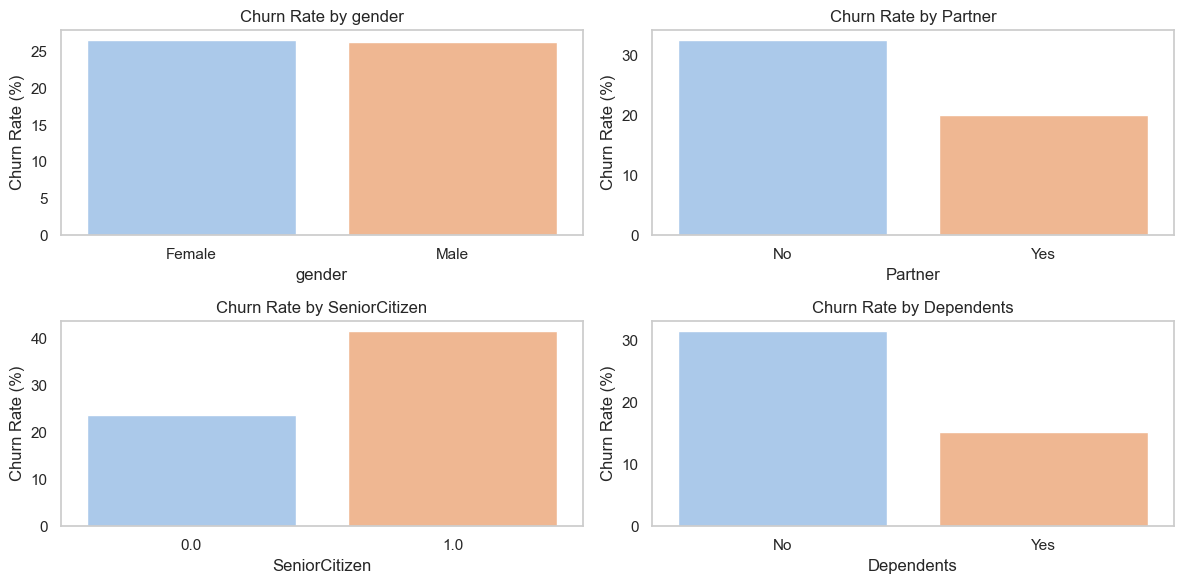

In [140]:
#2. How does key demographic factors (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') influence customer churn?


# Define the demographic features
demographic_features = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# Plotting the churn rates for each demographic feature
plt.figure(figsize=(12, 6))

for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    churn_rates = train.groupby(feature)['Churn'].mean() * 100
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate (%)')
    plt.grid(False)

plt.tight_layout()
plt.show()


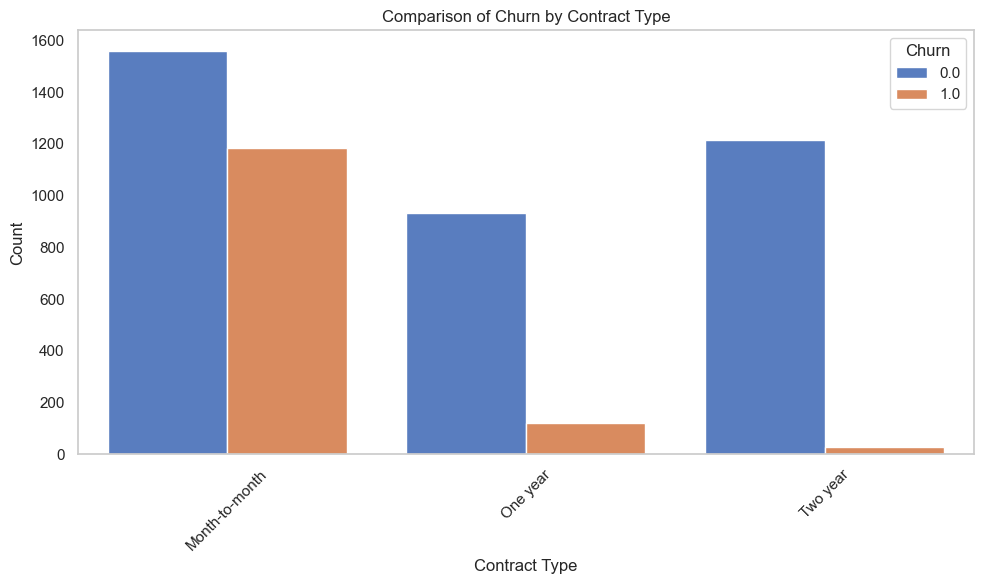

In [141]:
#6. How do different contract types affect customer churn?

# Plotting the count of churn for each contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Contract', hue='Churn', palette='muted')
plt.title('Comparison of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

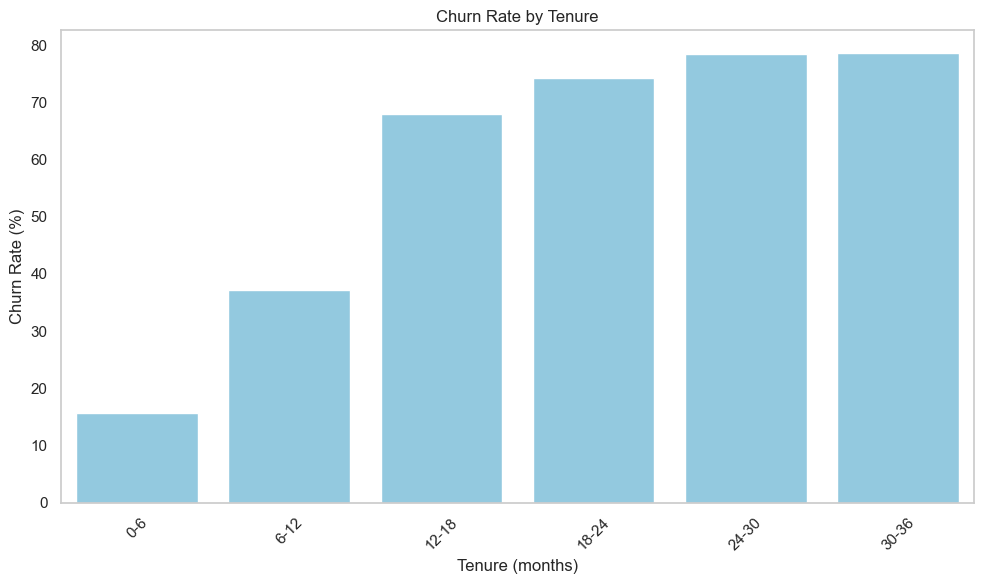

In [142]:
#3. How does the tenure of a customer impact their likelihood of churning?


np.random.seed(0) #enuring the starting point is the same every time
n_customers = 1000 # Setting a sumple for number if customers we are working with in this particular graph
tenure_months = np.random.randint(1, 36, size=n_customers) #Generate tenure data to ensure we simulate the number of months the customer has been 
churn_prob = np.clip(0.05 * tenure_months, 0, 0.8)  # Calculate churn probability
churned = np.random.random(size=n_customers) < churn_prob # Generating churn data
churn_prime = pd.DataFrame({'tenure': tenure_months, 'Churn': churned}) # Create a dataframe with the generated tenure and churn data

# Define tenure buckets 
tenure_bins = [0, 6, 12, 18, 24, 30, 36]
tenure_labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36']

# Assign each customer to a tenure bucket
churn_prime['tenure_bucket'] = pd.cut(churn_prime['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calculate churn rates for each tenure bucket
churn_rates = churn_prime.groupby('tenure_bucket')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

Chi2 Statistic: 881.6208905118242
P-Value: 3.61789584641233e-192


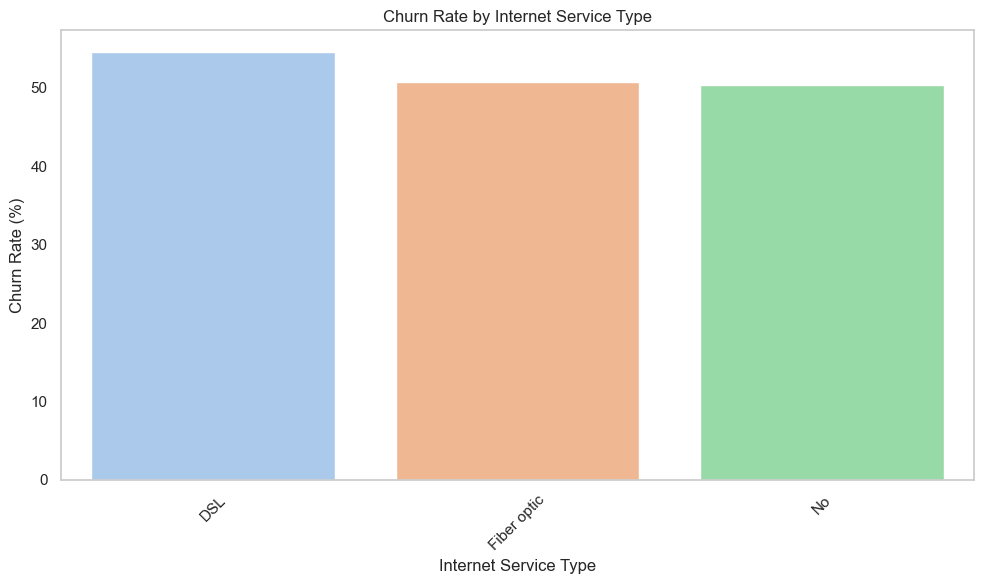

There is a significant association between Internet Service Type and Churn (p < 0.05).


In [143]:
#4. Is there a significant correlation between the type of internet service and customer churn?

from scipy.stats import chi2_contingency
# Data generation 
np.random.seed(0)
data = pd.DataFrame({
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=1000),
    'Churn': np.random.choice([0, 1], size=1000)
})

# Calculate churn rates by internet service type
churn_rates = data.groupby('InternetService')['Churn'].mean() * 100

# Perform chi-square test
# contingency_table = pd.crosstab(data['InternetService'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print chi-square test results
print(f'Chi2 Statistic: {chi2}')
print(f'P-Value: {p}')

# Plot churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

# Interpretation
if p < 0.05:
    print("There is a significant association between Internet Service Type and Churn (p < 0.05).")
else:
    print("There is no significant association between Internet Service Type and Churn (p >= 0.05).")


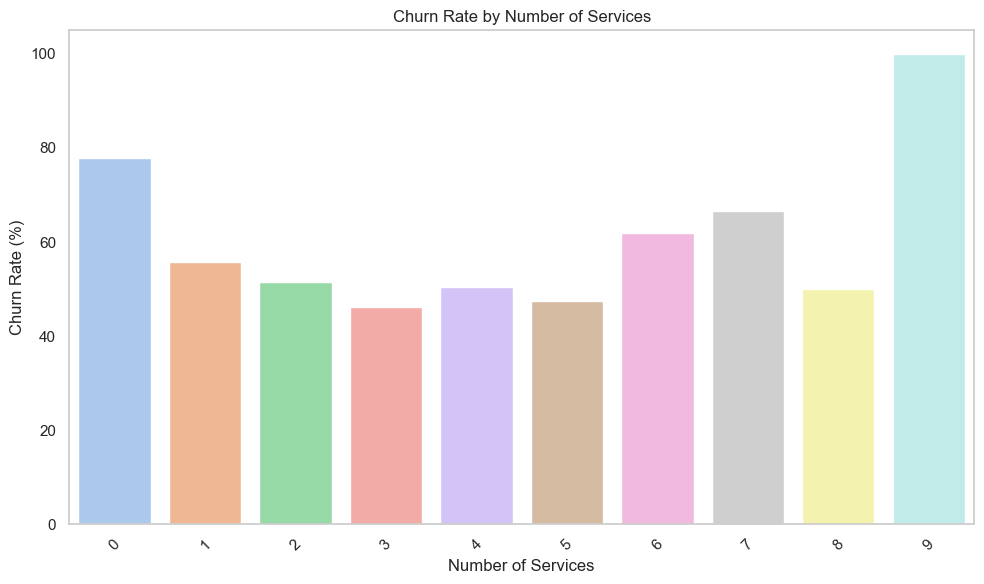

In [144]:
#5. Do customers with multiple services show different churn rates compared to those with  fewer services?

# Data generation 
np.random.seed(0)
n_customers = 1000
data = pd.DataFrame({
    'PhoneService': np.random.choice(['Yes', 'No'], size=n_customers),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_customers),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], size=n_customers),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'Churn': np.random.choice([0, 1], size=n_customers)
})

# Define a function to count the number of services a customer has
def count_services(row):
    services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    count = 0
    for service in services:
        if row[service] in ['Yes', 'DSL', 'Fiber optic']:
            count += 1
    return count

# Create a new column for the number of services
data['NumberOfServices'] = data.apply(count_services, axis=1)

# Calculate churn rates by number of services
churn_rates = data.groupby('NumberOfServices')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

In [145]:
from sklearn.compose import ColumnTransformer

# After fitting your preprocessor
preprocessor.fit(X_train)  # X_train is your training data

# Get feature names
transformed_feature_names = preprocessor.get_feature_names_out()


In [146]:
from sklearn.impute import SimpleImputer #filling mising values

# For categorical features, use the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')

# For numerical features, use the median
numerical_imputer = SimpleImputer(strategy='median')

In [147]:
from sklearn.preprocessing import OneHotEncoder #Encoding

categorical_encoder = OneHotEncoder(handle_unknown='ignore')

In [148]:
from sklearn.pipeline import Pipeline # Create a preprocesing pipeline 

categorical_pipeline = Pipeline([
   ('imputer', categorical_imputer),
    ('encoder', categorical_encoder)
])

from sklearn.preprocessing import StandardScaler

# Define the numerical scaler
numerical_scaler = StandardScaler()

# Update the numerical pipeline
numerical_pipeline = Pipeline([
   ('imputer', numerical_imputer),
   ('scaler', numerical_scaler)
])


In [149]:
from sklearn.preprocessing import StandardScaler

# Define the numerical scaler
numerical_scaler = StandardScaler()

# Update the numerical pipeline
numerical_pipeline = Pipeline([
   ('imputer', numerical_imputer),
   ('scaler', numerical_scaler)
])


In [150]:
from sklearn.ensemble import RandomForestClassifier # Build the final pipeline with  a ml model

model = Pipeline([
    ('preprocessor', preprocessor),
   ('classifier', RandomForestClassifier())
])


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #train and evaluate the model 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8077304261645193
Confusion Matrix:
 [[674  85]
 [109 141]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       759
         1.0       0.62      0.56      0.59       250

    accuracy                           0.81      1009
   macro avg       0.74      0.73      0.73      1009
weighted avg       0.80      0.81      0.80      1009



#### Checklist 
    - Missing values are handled 
    - True to yes and false to no 
    - Column names renaming 
    - Monthlycharge and Totalcharge columns need standardized decimals
    - Total charges column should be a float datatype
    - At least 5 Univariate Bivariate Multivariate Analysis 
    - Categorical columns analysis 
    - Hypothesis 
    - Visuals should check colinearity  Churn rate distribution
    - Analytical Questions 
    - Atleast 4 models
    - Evaluation
    - Choose 1 model - key metrics must be met 
    - Hyperparameter tuning must 
    - Predict test set and visualize resulst
    - Ensure to highlight at least 5 key insights, challanges and way forward 
    - Must have a conclusion